# Análisis de Datos en Recursos Humanos Colsubsidio

Un alto porcentaje de las compañías tiende a establecer categorías en donde enmarcar a sus empleados, clientes, etc. Estas categorías permiten diferenciar fácilmente a las personas situadas en ellas, facilitando su identificación, generalidades del grupo, características en común, etc. En ocasiones ubicar a una persona en una categoría puede ser difícil, ya que puede aplicar a más de una, esto obliga a que muchas veces este procedimiento se haga manual, siendo largo y tortuoso. 

Para el caso particular de la compañía Colsubsidio. Establecer a sus empleados en categorías es una tarea escencial del área de recursos humanos. Ya que en base a estas categorías, sus empleados reciben beneficios específicos. Actualmente éste proceso lo realiza manualmente un experto del área, haciendo de esta tarea algo tedioso y difícil cuando el número de empleados a clasificar es elevado.

### Objetivo:

Automatizar la clasificación de empleados de Colsubsidio según sus características, en las categorías previamente establecidas por la compañía.


In [1]:
#All imports
import warnings
import pandas as pd

from IPython.core.pylabtools import figsize
from src.Preprocessing.Preprocessing import Preprocess
from src.Preprocessing.Discretizing import Discretize
#from src.Association.Association import Association

from src.Clustering.Kmeans import Kmeans
from src.Clustering.DBscan import DBscan
from src.Clustering.Kmodes import Kmodes
from src.Clustering.Kprototypes import Kprototypes

from src.Classifying.Runner import Runner

figsize(14, 5)

warnings.filterwarnings('ignore')

file = 'files/database.csv'
dataset = pd.read_csv(file, index_col=False, header=0, delimiter="\t")

print dataset

print "La longitud del conjunto de datos es de", dataset.shape[0], "filas y", dataset.shape[1], "columnas."

C:\Users\abad_\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


          ID                                    CARGO FECHA INICIO POSESION  \
0       5607    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
1       5611    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
2       5643    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
3       6075    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
4       8440    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
5       3513        MEDICO ESPECIALISTA HEMATONCOLOGO            15/07/2010   
6       4626        MEDICO ESPECIALISTA HEMATONCOLOGO            19/08/2008   
7       3977        MEDICO ESPECIALISTA HEMATONCOLOGO            15/07/2010   
8      11486     GERENTE PROYECTO ALIMENTOS Y BEBIDAS            28/09/2016   
9       7357                        AUXILIAR MERCADEO             1/01/1960   
10      5727                         AUXILIAR EMPAQUE            17/01/2008   
11      3039                        AUXILIAR COCINA 

## Preprocesamiento.

#### Modulo de preprocesamiento.
Este modulo es usado para reemplazar valores faltantes usando la media de los datos. También se borran las variables que consideramos no eran de utilidad ya que no aportaban información o eran redundantes con otras.


In [2]:
preprocess = Preprocess( dataset )
dataset = preprocess.preprocessFile()
unprocessed = dataset.copy(deep=True)

PREPROCESSING MODULE 


Finding Minimum Wages
Replacing missing data in FECHA INICIO POSESION
Replacing missing data in PRIMERA ALTA
Replacing missing data in FECHA EXPIRACION CONTRATO
Replacing missing data in TURNO
Replacing missing data in HORARIO TRABAJO
Replacing missing data in CENTRO DE COSTE
Replacing missing data in TIPO DE PACTO ESPECIFICO
Deleting variables tat we consider useless ['ID', 'FECHA DE NACIMIENTO', 'FECHA INICIO POSESION', 'SALARIO', 'SUELDO TEXTO', 'HORAS SEMANALES', 'HORAS DIARIAS', 'FIN', 'SALARIO A 240', 'PRIMERA ALTA', 'CARGO', 'FECHA EXPIRACION CONTRATO']
La longitud del conjunto de datos es de 12394 filas y 23 columnas.


#### Discretización


DISCRETIZE MODULE 


EDAD DEL EMPLEADO


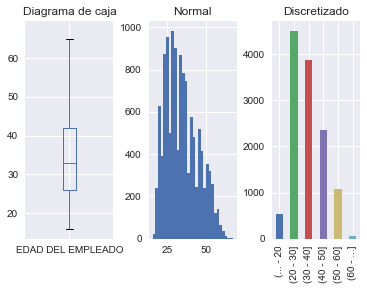

SALARIOS MINIMOS
29.49 0.03


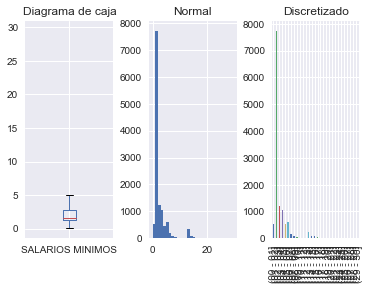

HORAS AL MES


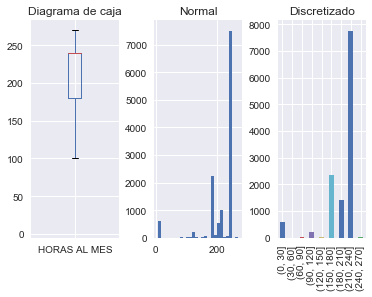

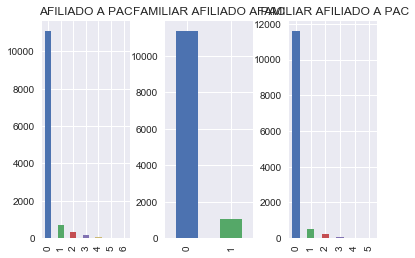

In [3]:
plotting = True #False to disable plotting
discretize = Discretize( dataset, True )
dataset = discretize.discretizeFile()

## Asociación

Para el módulo de asociación se utilizó Weka. Mediante un wrapper de Java a Python se lograron utilizar las herramientas que provee este framework.



* El 71% de las personas que ganan un minimo son jóvenes.
![Regla 1](files/images/Rule1.png "Regla 1")



* El 70% de las personas que ganan un salario mínim son mujeres.
![Regla 2](files/images/Rule2.png "Regla 3")



* El 98% de las personas con edades entre 40 y 50 años se encuentran en la categoría Media.
![Regla 3](files/images/Rule3.png "Regla 3")


In [4]:
association = Association( dataset )
keys = ["HORAS AL MES", "DIVISION", "AREA DE PERSONAL", "SEXO", "EDAD DEL EMPLEADO", "SALARIOS MINIMOS", "CATEGORIA"]

In [5]:
association.apriori(keys, confidence=0.7)

In [6]:
association.filteredApriori(keys, confidence=0.7)

## Agrupación

Para la fase de agrupación, se utilizó cuatro algoritmos de clustering para evaluar el impacto que tienen ciertas variables sobre la clasificación final del dataset. Estos algoritmos son:

- **K-means**
- **DBScan**
- **K-modes**
- **K-prototypes**

### K-means

Para la ejecución de **K-means** se ejecutó sobre las variables "EDAD DEL EMPLEADO", "SALARIOS MINIMOS" y "AFILIADO A PAC". Las cuales, según la descripción de las categorias, son de gran importancia en la clasificación. Esto también es debido a la restricción de variables nominales que el algoritmo posee.

Se ejecuta el algoritmo desde *K=3* hasta *K=5* y se calculanla suma de errores cuadrados y el índice Davies-Bouldin.

Los resultados de éste algoritmo son los más descriptivos y los clusters se asemejan más a la clasificación original. Con éste algoritmo se determinó que las variables utilizadas en ésta ejecución son las de mayor importancia en la clasificación y esto se confirma más adelante en el proceso de clasificación.

IMPRIMIENDO CLASIFICACION CORRECTA
LISTO
CALCULANDO EJECUCIONES K MEANS
CALCULANDO K = 3
	Error cuadratico: 254035.3887034991
	Indice Davies-Bouldin: 0.5385204241408169
	Homogeneidad: 0.4430079157744524
	Completitud: 0.3289289974071223
	V-score: 0.37753901151980207
CALCULANDO K = 4
	Error cuadratico: 187144.6926351182
	Indice Davies-Bouldin: 0.5170916336706652
	Homogeneidad: 0.46774996109951933
	Completitud: 0.27950730898698756
	V-score: 0.34991839662010804
CALCULANDO K = 5
	Error cuadratico: 149028.61821345842
	Indice Davies-Bouldin: 0.47678468509575345
	Homogeneidad: 0.5394073542304079
	Completitud: 0.2748313172472605
	V-score: 0.36413410192608003
CALCULANDO K = 6
	Error cuadratico: 115045.77092866198
	Indice Davies-Bouldin: 0.46203868060405057
	Homogeneidad: 0.5271542397042897
	Completitud: 0.2549496742073901
	V-score: 0.3436827236868429
CALCULANDO K = 7
	Error cuadratico: 95417.39985549511
	Indice Davies-Bouldin: 0.435523378821826
	Homogeneidad: 0.4799248550234035
	Completitud: 0.2

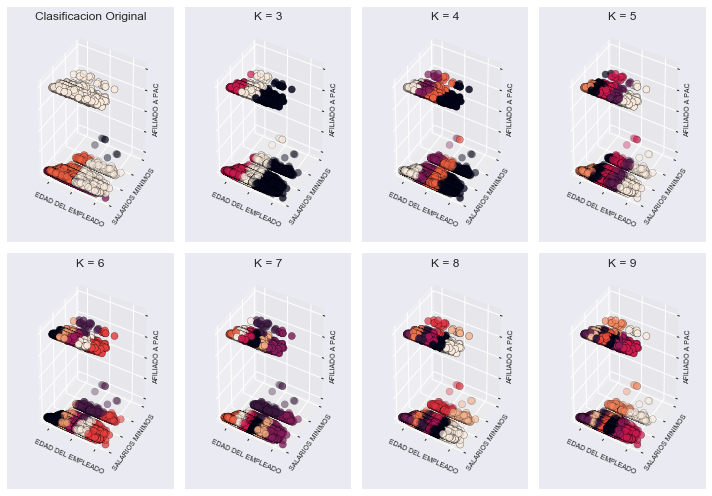

GRAFICANDO INDICES


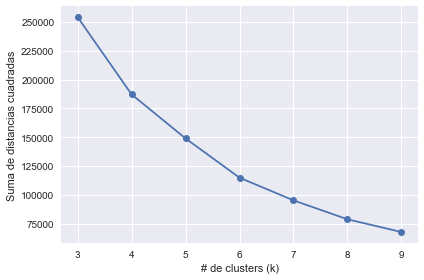

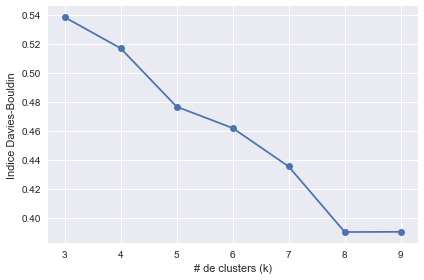

LISTO


In [7]:
kmeans = Kmeans(unprocessed)
kmeans.run()

### DBScan

La ejecución de **DBScan** se tomó como referencia de uso de algoritmos de clustering basados en densidad. Se utilizaron las mismas variables usadas en **K-means** debido a la misma restricción que presenta el algoritmo.

Para la prueba, se utilizaron 60 posibilidades de parámetros para *eps* y *min_samples* que van desde *eps=0.1* y *min_samples=10* hasta *eps=100* y *min_samples=500*. Se escogieron los 3 mejores resultados de acuerdo a la medida V-score que está definida en términos de la *homogeneidad* y la *completitud* de la agrupación.

Los resultados no son muy satisfactorios, la agrupación no se asemeja a la clasificación original y los resultados del v-score son demasiado bajos (para un máximo de 1.0), por lo que el algoritmo no describió mucho.

IMPRIMIENDO CLASIFICACION CORRECTA
LISTO
IMPRIMIENDO LAS 3 MEJORES EJECUCIONES SEGUN V-SCORE
DBScan 1
	Parametros: eps = 0.7 samples = 20
	Homogeneidad: 0.7652089988164595
	Completitud: 0.17526928766446886
	V-score: 0.2852115526002034
DBScan 2
	Parametros: eps = 0.9 samples = 20
	Homogeneidad: 0.7749277358130727
	Completitud: 0.17340726844861634
	V-score: 0.2833979581235301
DBScan 3
	Parametros: eps = 0.9 samples = 10
	Homogeneidad: 0.8234758306851341
	Completitud: 0.16733288393037443
	V-score: 0.2781456875840591


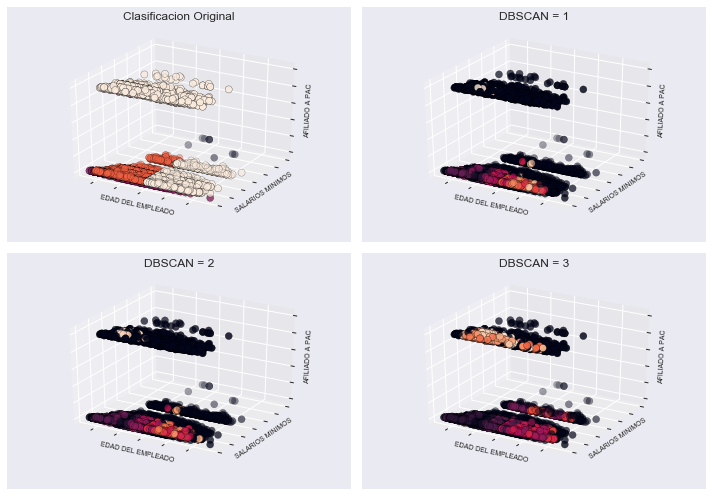

In [8]:
dbscan = DBscan(unprocessed)
dbscan.run()

### K-modes
Para la ejecución de **K-modes** se toma la totalidad del dataset procesado y discretizado debido a que el algoritmo sólo trabaja con valores categoricos. La implementación utilizada tiene dos métodos de uso descritos en amplias documentaciones, el método Huang y el método Cao.

Se ejecutó de la misma manera que **K-means** desde *K=3* hasta *K=9* y se calculan la suma de errores cuadrados pero no es posible calcular el índice Davies-Bouldin. También se realizaron dos ejecuciones de cada *K* usando los métodos Huang y Cao.

Los resultados de éste algoritmo no fueron de gran ayuda. Los resultados de agrupación no se asemejan a la clasificación original en ningún caso. Por lo que llegamos a que las variables categoricas pueden generar un gran ruido en la agrupación.

IMPRIMIENDO CLASIFICACION CORRECTA
LISTO
CALCULANDO EJECUCIONES K-MODES HUANG
CALCULANDO K = 3
	Error cuadratico: 86274.0
	# iteraciones: 2
	Homogeneidad: 0.03468246704965381
	Completitud: 0.025713862701724946
	V-score: 0.02953226461088188
CALCULANDO K = 4
	Error cuadratico: 80521.0
	# iteraciones: 2
	Homogeneidad: 0.023587177179962896
	Completitud: 0.015289140430315097
	V-score: 0.01855256291886219
CALCULANDO K = 5
	Error cuadratico: 76289.0
	# iteraciones: 2
	Homogeneidad: 0.12295243592688676
	Completitud: 0.06406878281557869
	V-score: 0.08424084675539974
CALCULANDO K = 6
	Error cuadratico: 72463.0
	# iteraciones: 2
	Homogeneidad: 0.07411625953105645
	Completitud: 0.0335107991566422
	V-score: 0.04615372969717099
CALCULANDO K = 7
	Error cuadratico: 73444.0
	# iteraciones: 4
	Homogeneidad: 0.08911864163342686
	Completitud: 0.03723602071716586
	V-score: 0.052525542380706565
CALCULANDO K = 8
	Error cuadratico: 73655.0
	# iteraciones: 3
	Homogeneidad: 0.1589278231095483
	Completitud: 0.06

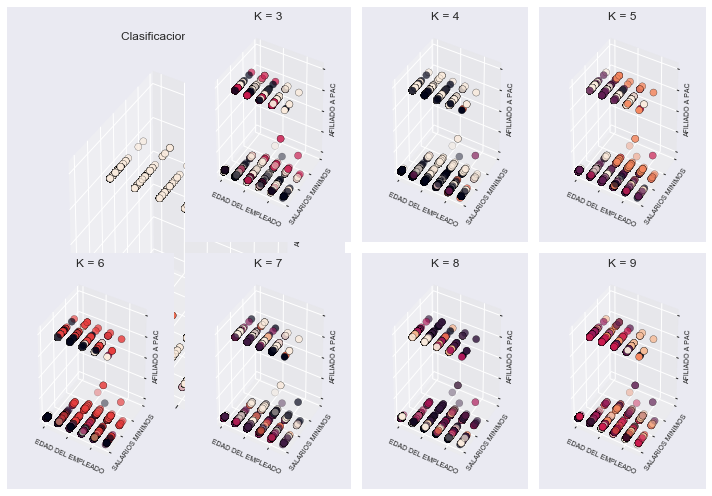

GRAFICANDO INDICES


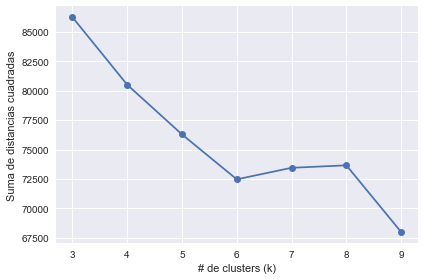

LISTO
IMPRIMIENDO CLASIFICACION CORRECTA
LISTO
CALCULANDO EJECUCIONES K-MODES CAO
CALCULANDO K = 3
	Error cuadratico: 84899.0
	# iteraciones: 4
	Homogeneidad: 0.06432810898629673
	Completitud: 0.05644027439194504
	V-score: 0.060126599706652316
CALCULANDO K = 4
	Error cuadratico: 80989.0
	# iteraciones: 4
	Homogeneidad: 0.05700647218822237
	Completitud: 0.03906199185174174
	V-score: 0.04635832110705027
CALCULANDO K = 5
	Error cuadratico: 78549.0
	# iteraciones: 2
	Homogeneidad: 0.04118303526648191
	Completitud: 0.023651312534598644
	V-score: 0.03004681534545268
CALCULANDO K = 6
	Error cuadratico: 73632.0
	# iteraciones: 3
	Homogeneidad: 0.054953042686183486
	Completitud: 0.02811138164197288
	V-score: 0.037195368964118306
CALCULANDO K = 7
	Error cuadratico: 71870.0
	# iteraciones: 4
	Homogeneidad: 0.09481889025240897
	Completitud: 0.044886248996762246
	V-score: 0.060929244841528625
CALCULANDO K = 8
	Error cuadratico: 70933.0
	# iteraciones: 3
	Homogeneidad: 0.08155151964078174
	Completit

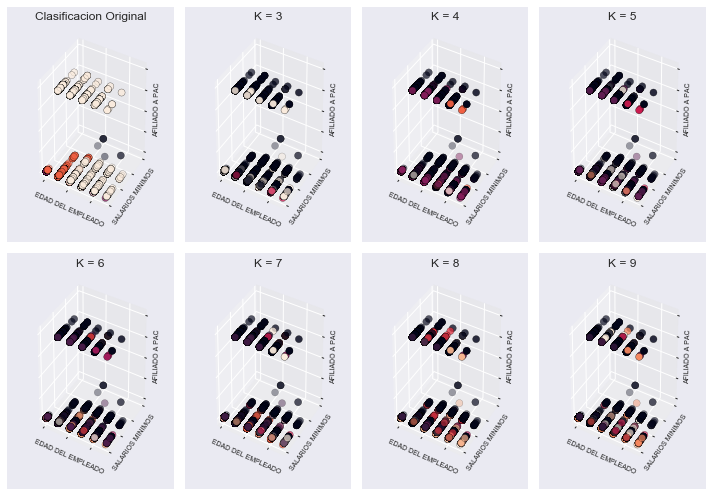

GRAFICANDO INDICES


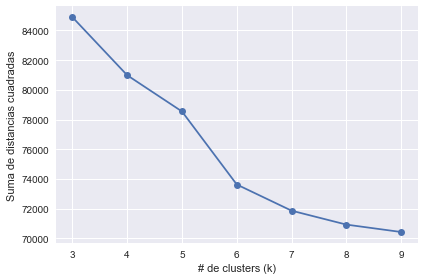

LISTO


In [9]:
kmodesHuang = Kmodes(dataset)
kmodesHuang.startClusteringKModesFullDataHuang()

kmodesCao = Kmodes(dataset)
kmodesCao.startClusteringKModesFullDataCao()

### K-prototypes

Por último, se utilizó una implementación del algoritmo **K-prototypes** que permite utilizar variables mixtas entre nominales y categoricas. Este algoritmo también tiene las dos posibilidades de método utilizado Huang o Cao como el algoritmo **K-modes**.

Se ejecutó de la misma manera que **K-means** y **K-modes** desde *K=3* hasta *K=9* y se calculan la suma de errores cuadrados pero no es posible calcular el índice Davies-Bouldin. También se realizaron dos ejecuciones de cada *K* usando los métodos Huang y Cao.

Los resultados de este algoritmo tampoco son de gran ayuda y el error de agrupación es incluso mayor que el del algoritmo **K-modes**

IMPRIMIENDO CLASIFICACION CORRECTA
LISTO
CALCULANDO EJECUCIONES K-PROTOTYPES HUANG
CALCULANDO K = 3
	Error cuadratico: 6393627.749063045
	# iteraciones: 4
CALCULANDO K = 4
	Error cuadratico: 5092077.129743977
	# iteraciones: 4
CALCULANDO K = 5
	Error cuadratico: 4152402.6412103614
	# iteraciones: 5
CALCULANDO K = 6
	Error cuadratico: 3541278.7656840887
	# iteraciones: 10
CALCULANDO K = 7
	Error cuadratico: 3370416.6769245234
	# iteraciones: 6
CALCULANDO K = 8
	Error cuadratico: 3311085.5686812554
	# iteraciones: 9
CALCULANDO K = 9
	Error cuadratico: 3108973.022294305
	# iteraciones: 9
LISTO


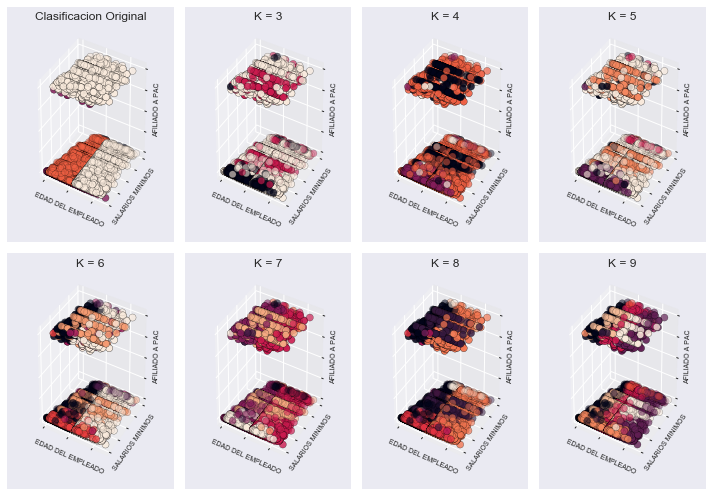

GRAFICANDO INDICES


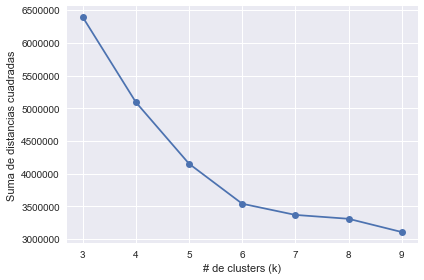

LISTO
IMPRIMIENDO CLASIFICACION CORRECTA
LISTO
CALCULANDO EJECUCIONES K-PROTOTYPES HUANG
CALCULANDO K = 3
	Error cuadratico: 6393627.749063044
	# iteraciones: 8
	Homogeneidad: 0.025447960242933026
	Completitud: 0.025241553793666615
	V-score: 0.025344336777317945
CALCULANDO K = 4
	Error cuadratico: 5092077.129743977
	# iteraciones: 4
	Homogeneidad: 0.03377872215638382
	Completitud: 0.025917785533871068
	V-score: 0.02933068316156424
CALCULANDO K = 5
	Error cuadratico: 5765705.540386406
	# iteraciones: 8
	Homogeneidad: 0.25033631679728674
	Completitud: 0.16188632600432695
	V-score: 0.1966220308343013
CALCULANDO K = 6
	Error cuadratico: 4970643.39897287
	# iteraciones: 6
	Homogeneidad: 0.07923985501038712
	Completitud: 0.055629763208114434
	V-score: 0.06536823384094742
CALCULANDO K = 7
	Error cuadratico: 4411459.059907335
	# iteraciones: 8
	Homogeneidad: 0.29266357242444513
	Completitud: 0.15500627429061611
	V-score: 0.20267029515154922
CALCULANDO K = 8
	Error cuadratico: 3342081.6365637
	

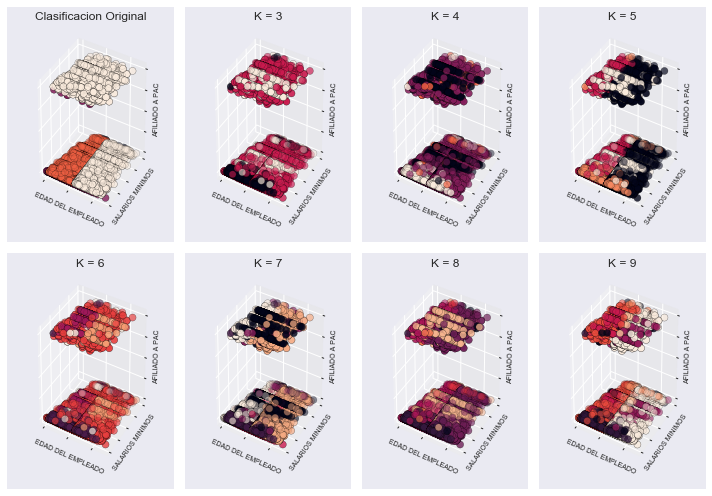

GRAFICANDO INDICES


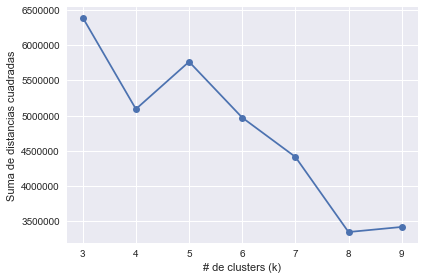

LISTO


In [10]:
kprototypesHuang = Kprototypes(unprocessed)
kprototypesHuang.startClusteringKPrototypesHuang()

kprototypesCao = Kprototypes(unprocessed)
kprototypesCao.startClusteringKPrototypesCao()

## Clasificación

El análisis de clasificación realizado se basa en las cuatro categorías establecidas por la compañía Colsubsidio [Alta, Media, Joven, Baja]

Después de realizar una serie de análisis, se observó que la clase alta cuenta solamente con 9 personas clasificadas en ella (menos del 1%) Por lo tanto se procedió a eliminarla, ya que las personas de ésta categoría tienen la característica de que reciben 20 o más salarios mínimos, lo que facilita su clasificación.

Se implementaron los siguientes tipos de clasificadores: 
- **Naive Bayes con función de Bernoulli** 
- **Dos arboles de decisión, uno usando índice de Gini y el segundo usando entropía**
- **Red neuronal** 
- **Support Vector Machine**
- **K Nearest Neighbors**

Para medir la efectividad de cada clasificador, se tuvo en cuenta: 
- **Accuracy**
- **Matriz de confusión**
- **Curvas ROC y su área bajo la curva**

Al tomar las medidas, se utilizó *Cross-validation* para todos los clasificadores con una cantidad de 6 folds.

Se muestra una tabla comparativa entre las curva ROC y las matrices de confusión.

BERNOULLI NAIVE BAYES
Accuracy for Bernoulli Naive Bayes is: 69.5518772708922
[[ 454   11   10]
 [ 159 6903  508]
 [   9 3074 1257]]
             precision    recall  f1-score   support

          0       0.73      0.96      0.83       475
          1       0.69      0.91      0.79      7570
          2       0.71      0.29      0.41      4340

avg / total       0.70      0.70      0.66     12385

DECISION TREE
Accuracy for Gini is: 88.57488897860316
[[ 458    8    9]
 [   6 6425 1139]
 [   0  253 4087]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       475
          1       0.96      0.85      0.90      7570
          2       0.78      0.94      0.85      4340

avg / total       0.90      0.89      0.89     12385

Accuracy for Entropy is: 93.97658457811869
[[ 458    8    9]
 [   6 7094  470]
 [   0  253 4087]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       475
          1      

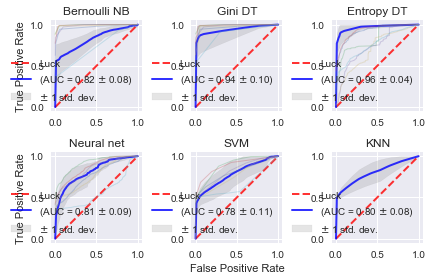

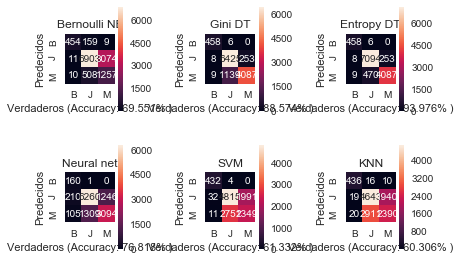

In [11]:
classifier = Runner(dataset)
classifier.runClassifiers()

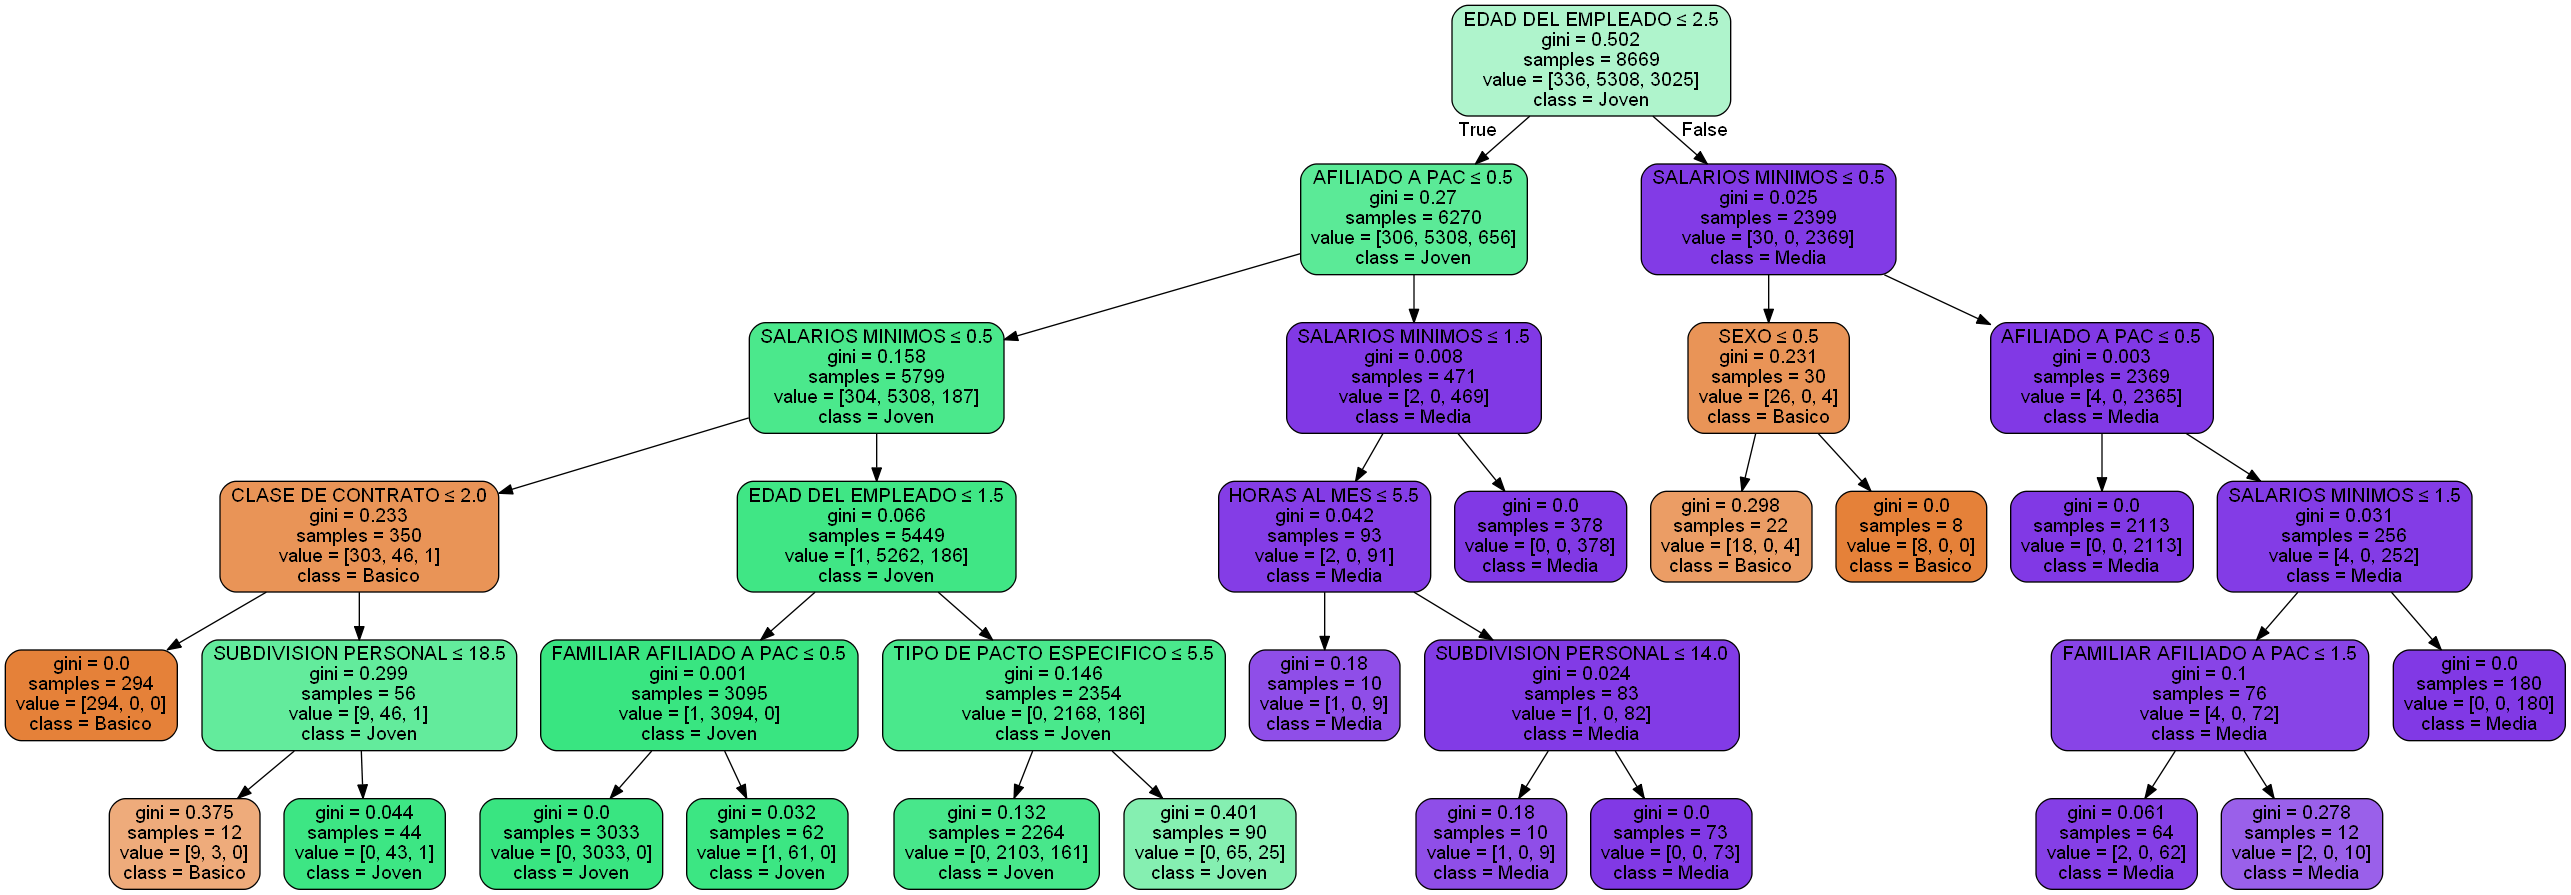

In [12]:
classifier.drawGiniTree()

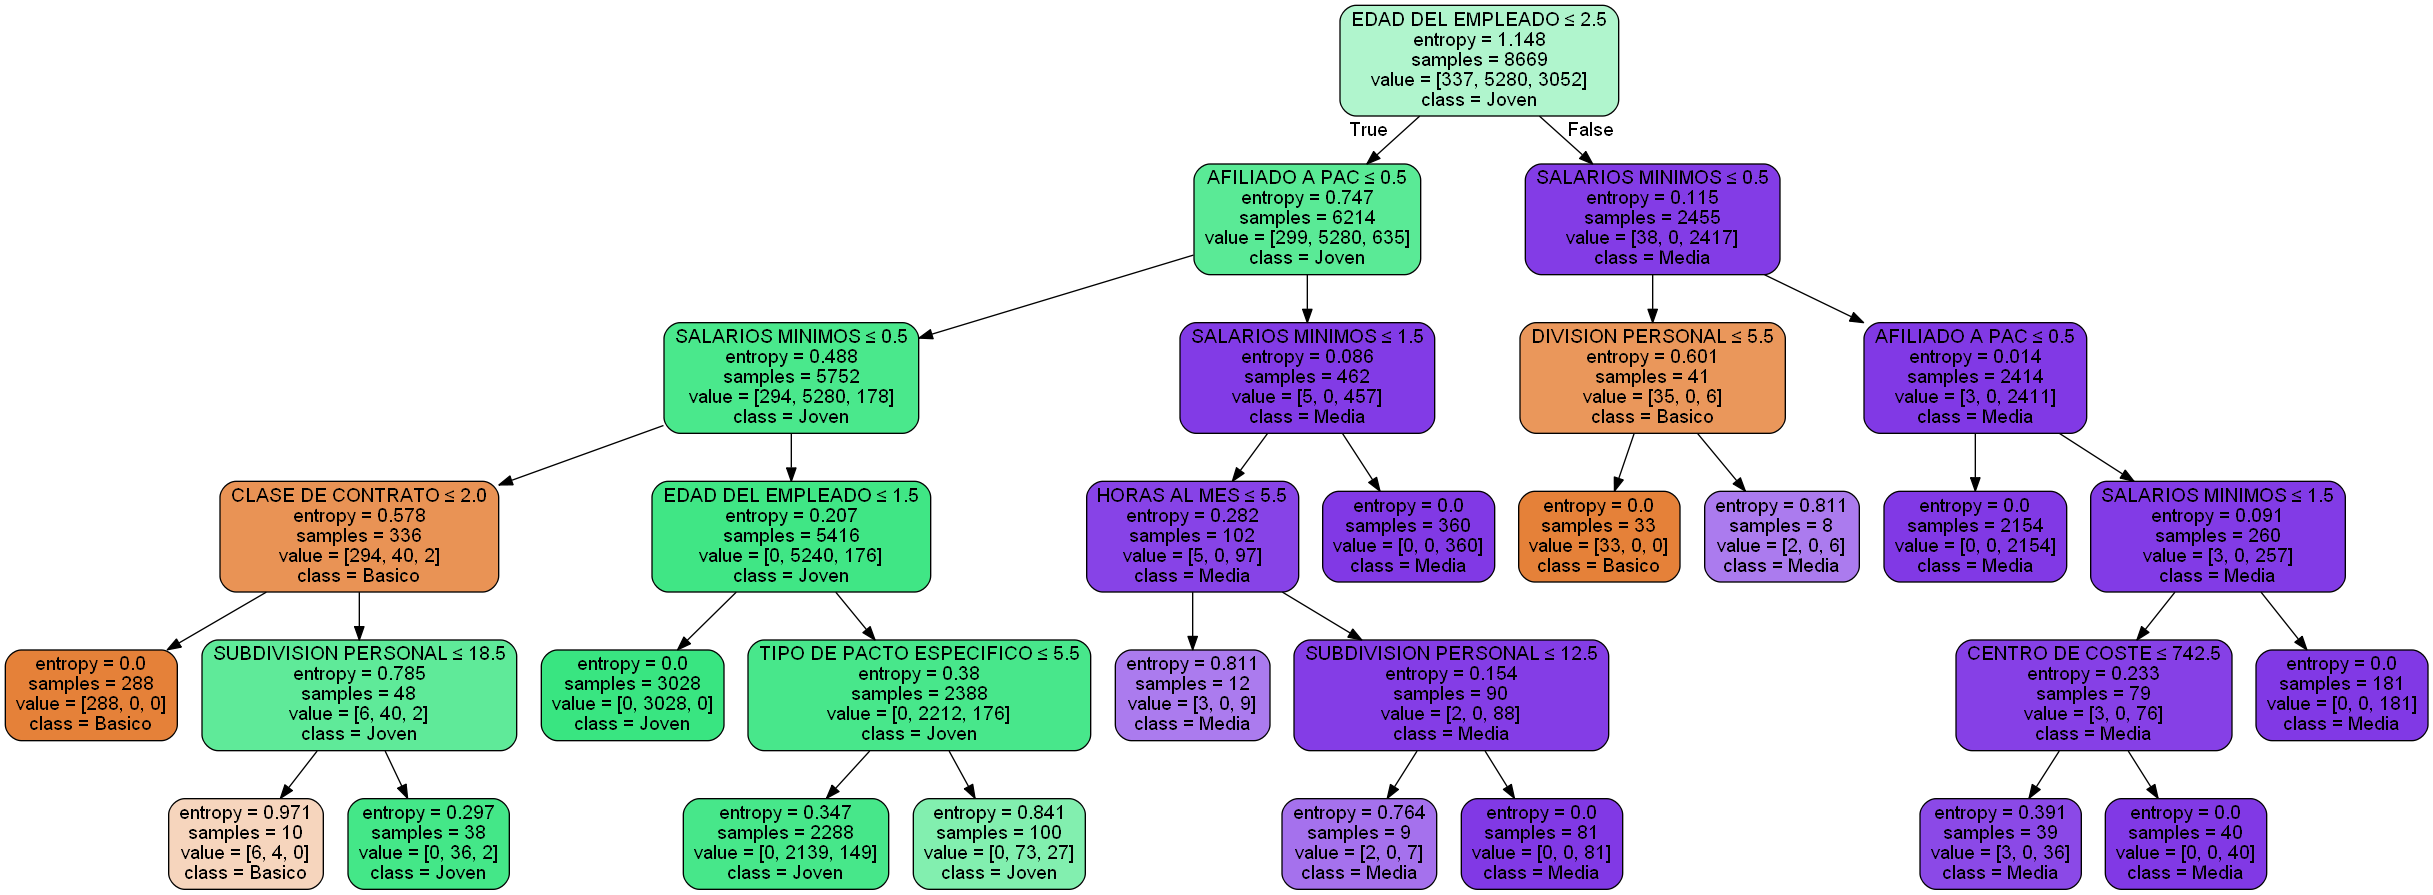

In [13]:
classifier.drawEntropyTree()